In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
df = pd.read_csv("prelim_datasets/gameandgrade.csv")

In [3]:
df.head()

,Sex,School Code,Playing Years,Playing Often,Playing Hours,Playing Games,Parent Revenue,Father Education,Mother Education,Grade
0,0,1,1,2,1,1,4,4,5,77.50
1,1,1,1,3,1,1,1,3,3,83.00
2,0,1,0,0,0,0,1,3,3,80.00
3,0,1,3,5,1,1,2,2,3,45.00
4,1,1,1,1,2,1,1,3,4,85.00


In [4]:
df["Grade"] = pd.to_numeric(df["Grade"], errors="coerce")
df_cleaned = df.dropna(subset=["Grade"])

In [5]:
X = df_cleaned.drop(columns=["Grade"])
y = df_cleaned["Grade"]

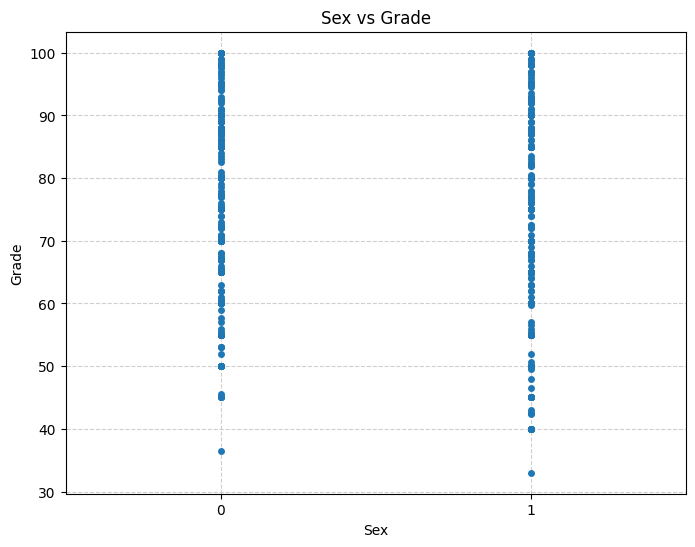

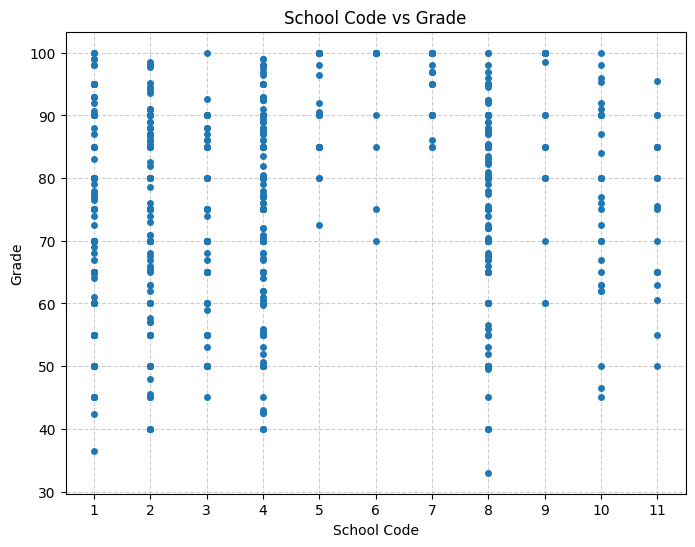

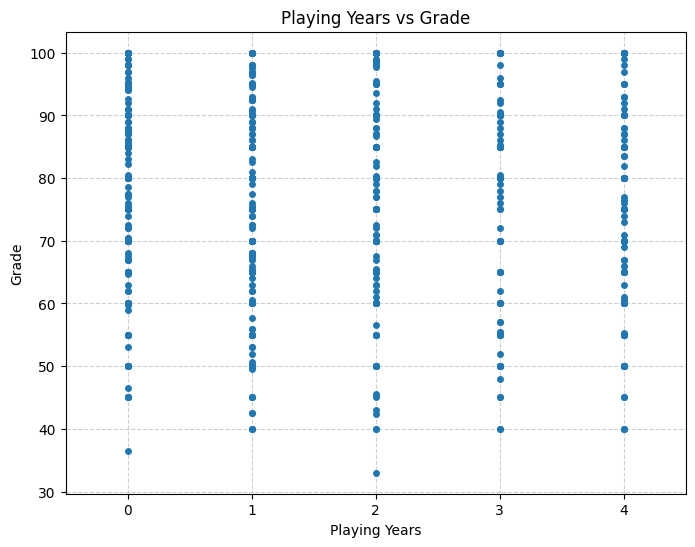

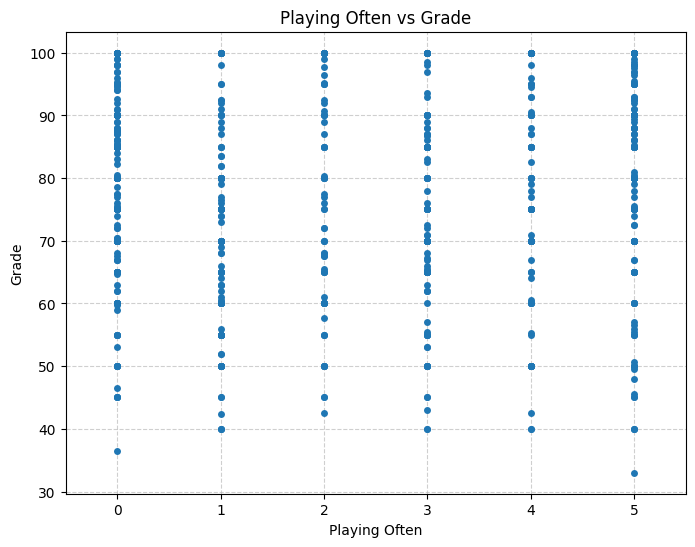

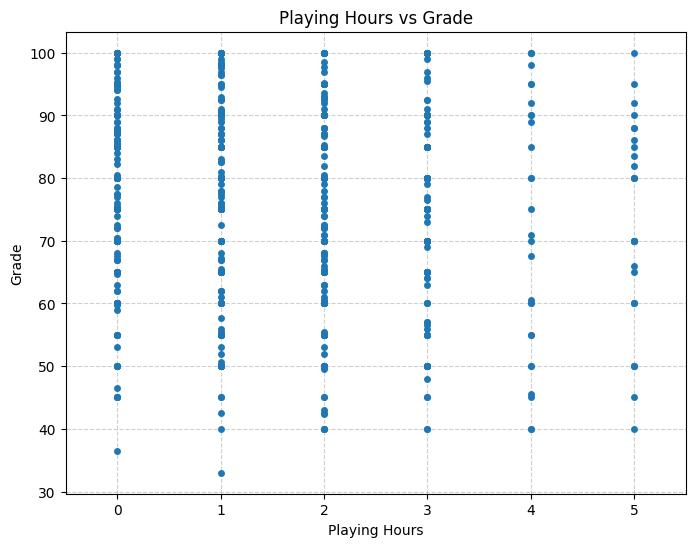

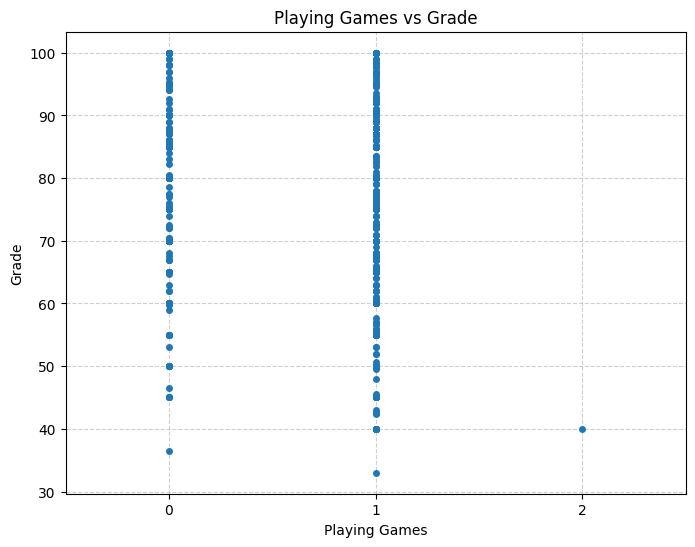

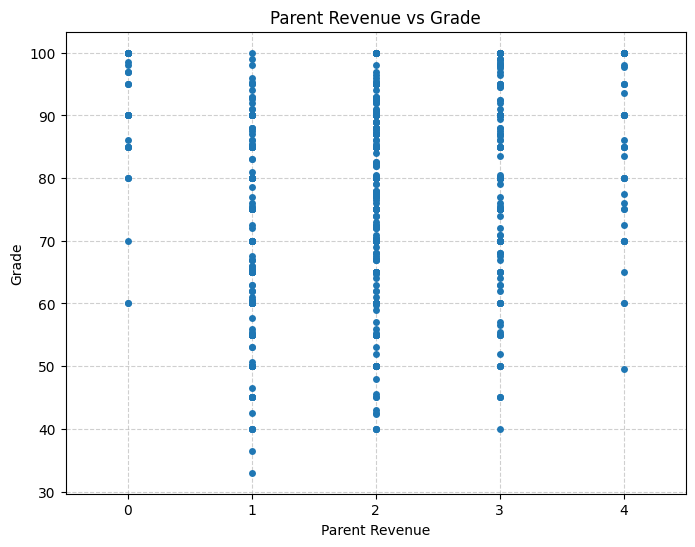

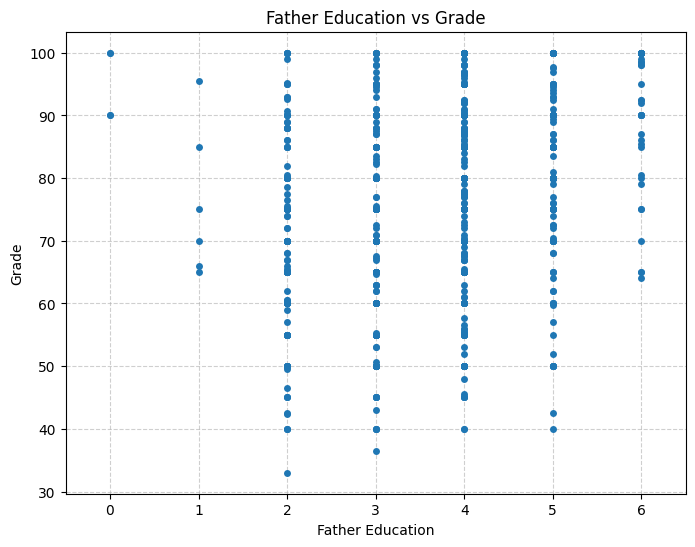

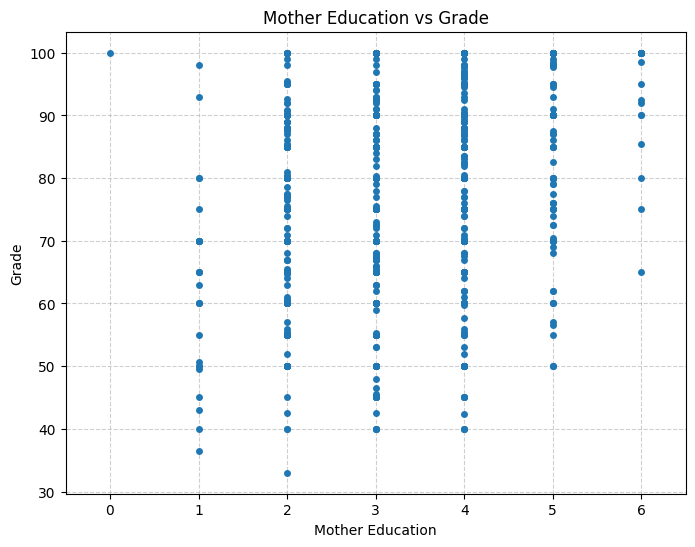

In [6]:
for column in df.columns[:-1]:  
    plt.figure(figsize=(8, 6))
    sns.stripplot(x=df[column], y=df["Grade"], jitter=False, size=5)

    plt.xlabel(column)
    plt.ylabel("Grade")
    plt.title(f"{column} vs Grade")
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.show()

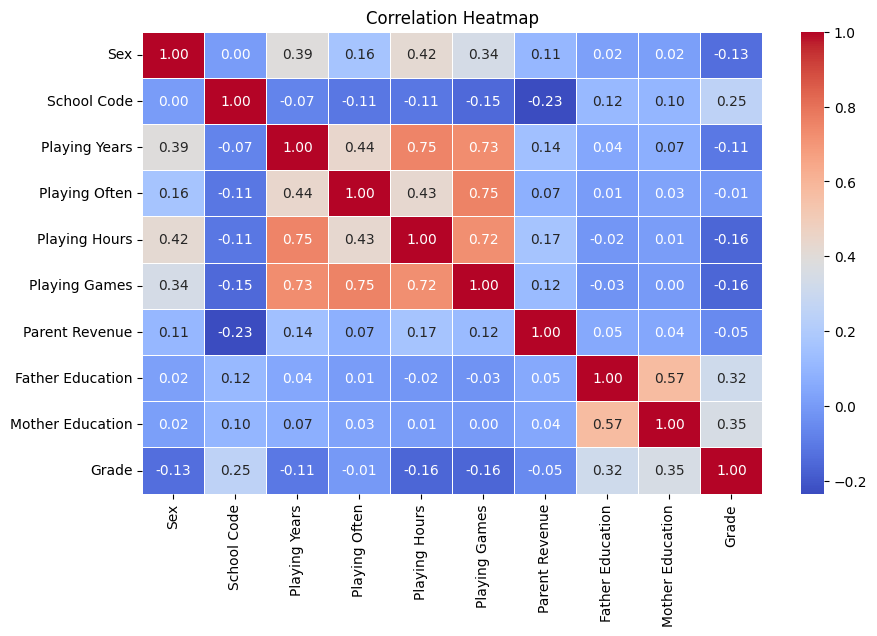

In [7]:
plt.figure(figsize=(10, 6))
df = df.apply(pd.to_numeric, errors='coerce')
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

Hmmmmmmm

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
mlr_model = LinearRegression()
mlr_model.fit(X_train, y_train)

LinearRegression()

In [14]:
print(f"Intercept (b): {mlr_model.intercept_:.2f}")  # The base score when all features are 0
coefficients = pd.DataFrame(mlr_model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

Intercept (b): 56.84
                  Coefficient
Sex                 -3.291391
School Code          0.943919
Playing Years        0.447885
Playing Often        1.584954
Playing Hours       -0.136112
Playing Games       -8.629698
Parent Revenue       0.053163
Father Education     2.275404
Mother Education     3.385605


In [10]:
y_pred_mlr = mlr_model.predict(X_test)

In [11]:
print("Training Set:")
print(X_train)
print(y_train)

print("\nTesting Set:")
print(X_test)
print(y_test)

Training Set:
     Sex  School Code  Playing Years  Playing Often  Playing Hours  \
60     0            1              0              0              0   
619    0            9              0              0              0   
346    1            4              4              3              1   
294    1            4              3              5              5   
231    1            3              2              3              1   
..   ...          ...            ...            ...            ...   
71     1            1              1              3              2   
106    0            1              0              0              0   
270    0            4              0              0              0   
436    1            6              0              0              0   
102    1            1              1              3              1   

     Playing Games  Parent Revenue  Father Education  Mother Education  
60               0               3                 6                 6  

In [12]:
mae_mlr = mean_absolute_error(y_test, y_pred_mlr)
rmse_mlr = mean_squared_error(y_test, y_pred_mlr) ** 0.5
print(f"Multiple Linear Regression - Mean Absolute Error (MAE): {mae_mlr:.2f}")
print(f"Multiple Linear Regression - Root Mean Squared Error (RMSE): {rmse_mlr:.2f}")

Multiple Linear Regression - Mean Absolute Error (MAE): 12.38
Multiple Linear Regression - Root Mean Squared Error (RMSE): 15.03


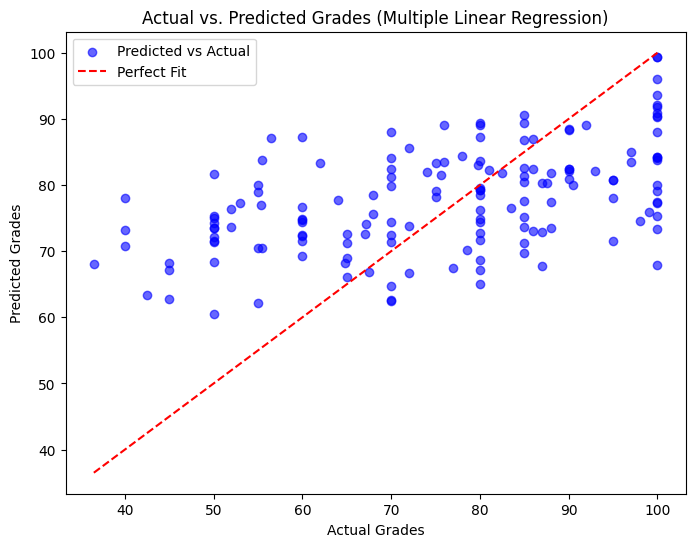

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_mlr, alpha=0.6, color="blue", label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--", label="Perfect Fit")
plt.xlabel("Actual Grades")
plt.ylabel("Predicted Grades")
plt.title("Actual vs. Predicted Grades (Multiple Linear Regression)")
plt.legend()
plt.show()